### Header
Author : Amina Matt  
Date created : 30.11.2021  
Date last modified : 30.11.2021  
Description : Top to bottom approach to select femonationalist quotes. Define keywords/patterns critera to select femonationalistic quotes from already selected quotes### Header
Author : Amina Matt  
Date created : 15.12.2021  
Date last modified : 15.12.2021  
Description : Investigation on specific clusters

### Imports

In [64]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
import torch
import pickle
import random
import spacy
import seaborn as sns
#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 350

In [2]:
from spacy.lang.en import English

In [3]:
PATH_GENERATED_DATA = './generated_data/'

In [4]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [5]:
import io
# load from pickle
with open(PATH_GENERATED_DATA+'BERTopic/BERTopic_topic_model.pkl', 'rb') as f:
    topic_model = CPU_Unpickler(f).load()
with open(PATH_GENERATED_DATA+'BERTopic/BERTopic_topics.pkl', 'rb') as f:
    topics = CPU_Unpickler(f).load()
with open(PATH_GENERATED_DATA+'BERTopic/BERTopic_probs.pkl', 'rb') as f:
    probs = CPU_Unpickler(f).load()

In [9]:
import io
# load from pickle
with open(PATH_GENERATED_DATA+'BERTopic/BERTopic_topic_model_reduced.pkl', 'rb') as f:
    topic_model = CPU_Unpickler(f).load()
with open(PATH_GENERATED_DATA+'BERTopic/BERTopic_topics_reduced.pkl', 'rb') as f:
    topics = CPU_Unpickler(f).load()
with open(PATH_GENERATED_DATA+'BERTopic/BERTopic_probs_reduced.pkl', 'rb') as f:
    probs = CPU_Unpickler(f).load()
with open(PATH_GENERATED_DATA+'BERTopic/topic_keywords_df.pkl', 'rb') as f:
    topic_keywords_df  = CPU_Unpickler(f).load()

In [158]:
topic_topics_df = pd.read_pickle(PATH_GENERATED_DATA+'BERTopic/BERTopic_topic_topics_df.pkl')

In [159]:
topic_topics_df.sample(15)

,topic,quotation
1861,0,"I'm pleased that the government recognizes poverty reduction, child care and affordable housing as important parts of a sustainable economy,"
17850,14,"It's important to do these awareness-raising events because Indigenous women are continuing to go missing. The problem is not going away,"
51514,-1,"What I say to Trudeau is that he's going to be responsible for the violent attacks against Indigenous women,"
15369,9,"BJP is becoming a messiah of Muslim women. But what are they giving them? The SC has already made the law by declaring it illegal. While BJP is trying to take credit, what is doing for Muslim women? Leave them to fend for themselves."
45376,-1,"Showtime respects me, it's just that they never had to do certain things for women's fights and the fighters that came before me never voiced these things. They may have voiced, `Oh, we not getting equal pay,' but they didn't voice the small things that lead to equal pay, and equal promotion is one of those big things."
49931,-1,"Not only sexual harassment, but any form of discrimination. We have to believe in what is necessary and what is right. It can't be gray. It's either black or white. There's no middle. You either did it or you didn't do it."
39420,-1,"It is fortunate that there are relatively few substantiated incidents of sexual harassment, but even one incident is too many."
21052,23,"We felt that she should be seen as what she is, which is a tireless fighter on behalf of women's rights and civil rights. Instead, the noise was so critical of her that we wanted to show that she was the real deal."
23324,33,"What do we do when no less than the man occupying the highest post in the land promotes rape culture through his misogynistic statements and his sexual harassment of women in public?,"
21566,25,"The collaboration will broaden and deepen various pioneering initiatives for gender equity and women empowerment launched by Kerala through the Gender Park,"


In [156]:
topic_keywords_df

,Topic,Count,Name
0,-1,31606,"[women, rights, sexual, harassment]"
1,0,6701,"[care, child, families, quality]"
2,1,2597,"[equal, pay, work, equality]"
3,2,1076,"[sport, sports, game, athletes]"
4,3,816,"[harassment, sexual, hostile, verbal]"
5,4,785,"[violence, based, gender, domestic]"
6,5,770,"[students, sexual, university, harassment]"
7,6,760,"[muslim, women, hijab, oppression]"
8,7,700,"[harassment, sexual, allegations, committee]"
9,8,694,"[film, hollywood, films, industry]"


In [211]:
topic_topics_df[topic_topics_df ['topic']==19].head(50)

,topic,quotation
19562,19,"I've been in and around enough campaigns to know that there's an ebb and flow. Polls go up and down; people's attention and decision-making changes over time. I feel very confident about where we are in the campaign and very committed to doing everything I can to make my case as effectively as possible to women and men, and I think that will be..."
19563,19,I feel very confident about where we are in the campaign and very committed to doing everything I can to make my case as effectively as possible to women and men.
19564,19,"I've been and around enough campaigns to know there's an ebb and flow -- polls go up and down, people's attention and decision making changes over time. I feel very confident about where we are in the campaign and very committed to doing everything I can to make my case as effectively as possible to women and men and I think that will be succes..."
19565,19,Polls change and attention and decision-making change... I feel very confident where we are in the campaign and very commuted to doing everything I can do to make my case effectively to women and men.
19566,19,"People were able to observe just how different things could be for female candidates - and not just Clinton, but [ Sarah ] Palin, too,"
19567,19,"I feel very confident about where we are in the campaign and very committed to doing everything I can to make my case as effectively as possible to women and men, and I think that will be successful,"
19568,19,"to make women and men feel comfortable with the idea of a woman president,"
19569,19,"We cannot definitely speak to the motivation of each of these female candidates. But the anecdotal stories and evidence that we have... indicates that women have been energised to respond to this president and this administration,"
19570,19,"Former presidential candidate Hillary Clinton expressed concern over the current direction of the United States and Russia's purported involvement in November's election Thursday at a women's summit in New York. Clinton spoke in a 44-minute interview at the eighth annual Women in the World Summit, an event celebrating equality and women's right..."
19571,19,"I started the campaign knowing that I would have to work extra hard to make women and men feel comfortable with the idea of a woman president. It doesn't fit into the -- the stereotypes we all carry around in our head. And a lot of the sexism and misogyny was in service of these attitudes. Like, you know, `We really don't want a woman commander..."


# Functions

In [42]:
def polarized_median(df):
    #subsets dataframe sentiments
    lim = 0.05
    df_neg = df[df['sentiment']<-0.05]
    df_pos = df[df['sentiment']>0.05]
    df_neu = df[(df['sentiment']>-0.05) & (df['sentiment']<0.05)]
    neg_median = df_neg['sentiment'].describe()['50%']
    pos_median = df_pos['sentiment'].describe()['50%']
    return (neg_median,pos_median)

def plot_with_medians(df,ylimit):#separate three color
    lim = 0.05
    df_neg = df[df['sentiment']<-lim]
    df_pos = df[df['sentiment']>lim]
    df_neu = df[(df['sentiment']>-lim) & (df['sentiment']<lim)]
    # Just write the name of the font
    mpl.rcParams['font.sans-serif'] = 'Lato'
    plt.rcParams['font.size'] = 15
    plt.rcParams["figure.figsize"] = (25,5)
    # Hide grid lines

    n = 20 
    ax1 = df_neg['sentiment'].hist(bins=n, figsize = [8,5],color ='#FF3A20')
    df_pos['sentiment'].hist(bins=n, figsize = [8,5],color='#4EA692')
    df_neu['sentiment'].hist(bins=4, figsize = [8,5],alpha=0.5,color='#FFB60A')#opacity low for neutral
    #limit 
    ax1.set_ylim(0,ylimit)
    #plt.box(False)#ax1.axis('off')
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(True)
    # Only show ticks on the left and bottom spines
    #ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    plt.grid(False)
    #get medians
    (neg_median,pos_median) = polarized_median(df)

    print(neg_median,pos_median)
    #OTHER COLOR BLUE 
    #58699D
    #vertical line to legend
    plt.axvline(x=neg_median, ymin=0, ymax=0.73,color = 'Gray')
    plt.axvline(x=pos_median, ymin=0, ymax=0.73,color = 'Gray')
    #legends on it
    plt.text(neg_median, ylimit*0.71, 'MEDIAN\n Negative ', fontsize=12)
    plt.text(pos_median, ylimit*0.71, 'MEDIAN\n Positive ', fontsize=12)
    fig1 = plt.gcf()
    plt.show()
    return fig1


def add_sentiment(df):
    analyzer = SentimentIntensityAnalyzer()
    df['sentiment'] = df['quotation'].apply(lambda x : analyzer.polarity_scores(x)['compound'])
    return df

# Femonationalism theme

In [160]:
#Manually selected clusters of interest 
print(topic_keywords_df.iloc[7])
femonat_df = topic_topics_df[topic_topics_df ['topic']==6]
len(femonat_df)

Topic                                     6
Count                                   760
Name     [muslim, women, hijab, oppression]
Name: 7, dtype: object


760

In [36]:
femonat_df.head()

,topic,quotation
12745,6,"By refusing to conform to the `hijabi stereotype' , these westernised Muslim women have made it impossible for Left-leaning white saviours to covertly milk this stereotype, in our heroic battle against stereotyping."
12746,6,"Neither she, nor a major report prepared for the Commission on the Status of Women (CSW) meeting she was addressing in New York, identified radical Islamic ideology as a leading factor, although surveys have found Muslim nations fare worst in gender equality rankings,"
12747,6,"In her new role and with her directly relevant background, Purna will help address the deep-rooted patterns of inequality and abuse of women,"
12748,6,"You can regurgitate Fox News as much as you want to get some book sales, but that's not doing anything to contribute to the progression of Muslim women's rights or our place in society or anything like that,"
12749,6,"Muslim women are the minority that are most visible. We're the ones that wear scarfs on our heads,"


### Sentiment analysis 

-0.5106 0.4939


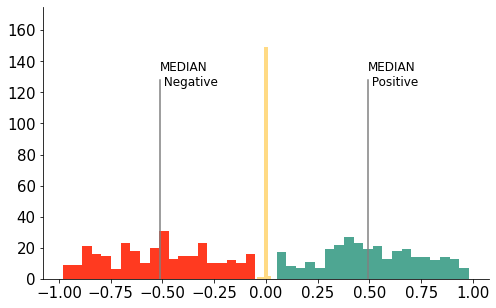

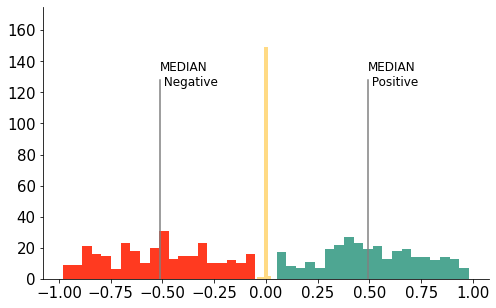

In [54]:
femonat_sent = add_sentiment(femonat_df)
plot_with_medians(femonat_sent,175)

In [56]:
lim = 0.05
femonat_neg = femonat_sent[femonat_sent['sentiment']<-lim]
femonat_pos = femonat_sent[femonat_sent['sentiment']>lim]
femonat_neu = femonat_sent[(femonat_sent['sentiment']>-lim) & (femonat_sent['sentiment']<lim)]

In [209]:
femonat_pos.head(30)

,topic,quotation,sentiment
12748,6,"You can regurgitate Fox News as much as you want to get some book sales, but that's not doing anything to contribute to the progression of Muslim women's rights or our place in society or anything like that,",0.5267
12750,6,"A lot of conversations relevant to Muslim women centred on dressing and the public sphere. It was menial, on whether they could wear nail polish while praying,",0.3612
12753,6,"Right now, the fashion industry is loving modest fashion. While that can be a great thing, it's so easy to commodify the hijab because it's hot right now in a way that exploits, rather than empowers, Muslim women,",0.8845
12754,6,"And that is more important than anything else in my opinion: the long legacy of Muslim women speaking truth to power that is rarely highlighted, but should be.",0.2952
12755,6,"We wanted to allow this first collection to really capture the spectrum of Muslim women,",0.2263
12760,6,"It's just one of the many ways that Islam exudes feminist principles, and I'm really proud of that. Muslim women suffer a huge double standard in that people tend to attribute any misogyny we experience to our religion rather than patriarchal issues, when in actuality one of the founding principles of Islam is gender equality.",0.2944
12764,6,wanted to create a day where we just celebrate Muslim women... and engineer a new precedent for Muslim women's representation in mainstream media.,0.7003
12765,6,"A woman who wears a niqab or a burka is still our sister. We defend the right of Muslim women, and all women, to wear whatever they want.",0.0772
12768,6,"I want people to see that there are Muslim women who challenge the stereotypes and conceptions of what Muslim women are,",0.1531
12770,6,It's a tough political environment we're in right now. I think Muslims are under the microscope and I'm hoping to change the image that people may have of Muslim women.,0.3182


In [61]:
femonat_neg.head(20)

,topic,quotation,sentiment
12745,6,"By refusing to conform to the `hijabi stereotype' , these westernised Muslim women have made it impossible for Left-leaning white saviours to covertly milk this stereotype, in our heroic battle against stereotyping.",-0.6833
12746,6,"Neither she, nor a major report prepared for the Commission on the Status of Women (CSW) meeting she was addressing in New York, identified radical Islamic ideology as a leading factor, although surveys have found Muslim nations fare worst in gender equality rankings,",-0.4445
12747,6,"In her new role and with her directly relevant background, Purna will help address the deep-rooted patterns of inequality and abuse of women,",-0.3612
12756,6,"The images we're used to seeing of Muslim women elicit a negative feeling and do nothing to truly represent how we look, feel, sound, and act.",-0.6814
12757,6,"When we're able to represent Muslim women from all these diverse lifestyles, these diverse backgrounds, it really is able to humanize us -- as much as I hate to use that language,",-0.5719
12759,6,"MuslimGirl is a platform for Muslim women to reclaim their narrative in the media. I launched it from my bedroom when I was 17 years old after growing up, like many millennial Muslim women, completely frustrated by our lack of representation in the media,",-0.3167
12766,6,"Muslim women are tired of having to go to a store and buy four different items to layer for one outfit,",-0.4404
12783,6,Muslim women should go the hell back to where they came from.,-0.6808
12787,6,"We will also engage in the ideological fight, speaking with clarity about the threat of Radical Islam, which openly advocates for the oppression of women, gays, Christians, Jews and nonbelievers, etc,",-0.2263
12788,6,"They are using Saul Alinsky's `Rules for Radicals' number 13: Quote, `Pick the target, freeze it, personalize it and polarize it, cut off the support network and isolate the target from sympathy.' That is what the anti-Trump press is doing. But back to Trump himself -- two things in play here. He is not recognizing that explosive comments like ...",-0.3590


### Timeline

In [162]:
femonat_date = pd.DataFrame()
#replace with full dataset
for i in range(len(femonat_df)):
    new = df[df['quotation']==femonat_df.iloc[i]['quotation']]
    femonat_date = femonat_date.append(new)

In [163]:
femonat_date

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
27420,2017-06-09-015816,"By refusing to conform to the `hijabi stereotype' , these westernised Muslim women have made it impossible for Left-leaning white saviours to covertly milk this stereotype, in our heroic battle against stereotyping.",Hillary Clinton,[Q6294],2017-06-09 15:00:28,1,"[[Hillary Clinton, 0.7997], [None, 0.2003]]",[https://whyevolutionistrue.wordpress.com/go/islam/zubin-madon-has-the-perfect-response-to-the-islamophilic-virtue-signalers/],E
8128,2015-03-10-055020,"Neither she, nor a major report prepared for the Commission on the Status of Women (CSW) meeting she was addressing in New York, identified radical Islamic ideology as a leading factor, although surveys have found Muslim nations fare worst in gender equality rankings,",Phumzile Mlambo-Ngcuka,[Q540935],2015-03-10 12:12:11,1,"[[Phumzile Mlambo-Ngcuka, 0.6252], [None, 0.3748]]",[http://www.prisonplanet.com/un-says-conservatism-a-threat-to-womens-rights-downplays-islam.html],E
55067,2018-04-23-054852,"In her new role and with her directly relevant background, Purna will help address the deep-rooted patterns of inequality and abuse of women,",Phumzile Mlambo-Ngcuka,[Q540935],2018-04-23 20:00:00,2,"[[Phumzile Mlambo-Ngcuka, 0.5939], [None, 0.4061]]","[http://www.indiawest.com/news/global_indian/indian-american-woman-to-head-up-new-division-addressing-sexual/article_b7d9e400-4726-11e8-94f6-fba29da23076.html, http://www.indiawest.com/news/global_indian/indian-american-woman-to-head-up-new-un-division-addressing/article_b7d9e400-4726-11e8-94f6-fba29da23076.html]",E
59,2015-03-26-115134,"You can regurgitate Fox News as much as you want to get some book sales, but that's not doing anything to contribute to the progression of Muslim women's rights or our place in society or anything like that,",Amani Al-Khatahtbeh,[Q27663524],2015-03-26 12:39:05,1,"[[Amani Al-Khatahtbeh, 0.851], [None, 0.149]]",[http://www.huffingtonpost.com/2015/03/26/muslim-women-ayaan-hirsi-ali-islam_n_6941884.html],E
3334,2015-12-04-069431,"Muslim women are the minority that are most visible. We're the ones that wear scarfs on our heads,",Amani Al-Khatahtbeh,[Q27663524],2015-12-04 06:10:16,5,"[[Amani Al-Khatahtbeh, 0.7739], [None, 0.2262]]","[http://4029tv.com/money/im-muslim-and-i-work-in-tech/36792772, http://wdsu.com/money/im-muslim-and-i-work-in-tech/36792772, http://rss.cnn.com/c/35493/f/676930/s/4bfffb56/sc/21/l/0Lmoney0Bcnn0N0C20A150C120C0A40Ctechnology0Cmuslims0Ein0Etech0Cindex0Bhtml0Dsection0Fmoney0Inews0Iinternational/story01.htm, http://rss.cnn.com/c/35493/f/677907/s/4bf...",E
...,...,...,...,...,...,...,...,...,...
85518,2020-01-31-091818,"Then, why they so perturbed when Muslim women are marching on the streets demanding `azadi' .",Arfa Khanum Sherwani,[Q57915277],2020-01-31 11:46:58,1,"[[Arfa Khanum Sherwani, 0.5044], [None, 0.4956]]",[https://www.freepressjournal.in/bhopal/people-battling-to-protect-idea-of-india-constitution-aishe-ghosh-address-the-caarwaa-in-bhopal],E
85705,2020-01-21-058761,"On the one hand, the government says it cares for Muslim women and even terms them as sisters. On the other hand, their blankets are being taken away, toilets are being locked and food packets are being snatched,",Munawwar Rana,[Q6935624],2020-01-21 18:06:50,1,"[[Munawwar Rana, 0.9499], [None, 0.0501]]",[https://www.news18.com/news/india/as-anti-caa-protests-at-lucknows-clock-tower-gain-momentum-lawyers-vow-to-protect-constitution-2467845.html],E
85930,2020-03-05-041843,It's not like a history book that explains the oppression of women or something. It's just derogatory words and... sentences put in the middle of the internet without giving any context.,Carol Off,[Q5044493],2020-03-05 23:23:10,1,"[[Carol Off, 0.8163], [None, 0.1837]]",[https://www.cbc.ca/radio/asithappens/as-it-happens-wednesday-edition-1.5485533/why-activists-say-the-oxford-english-dictionary-results-for-woman-are-sexist-1.5487159],E
86168,2020-01-0

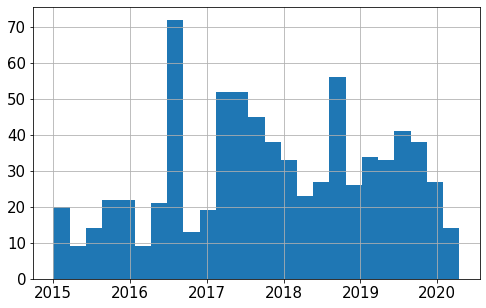

In [169]:
#when
fig = femonat_date['date'].hist(bins=25, figsize = [8,5])

<AxesSubplot:xlabel='date', ylabel='sentiment'>

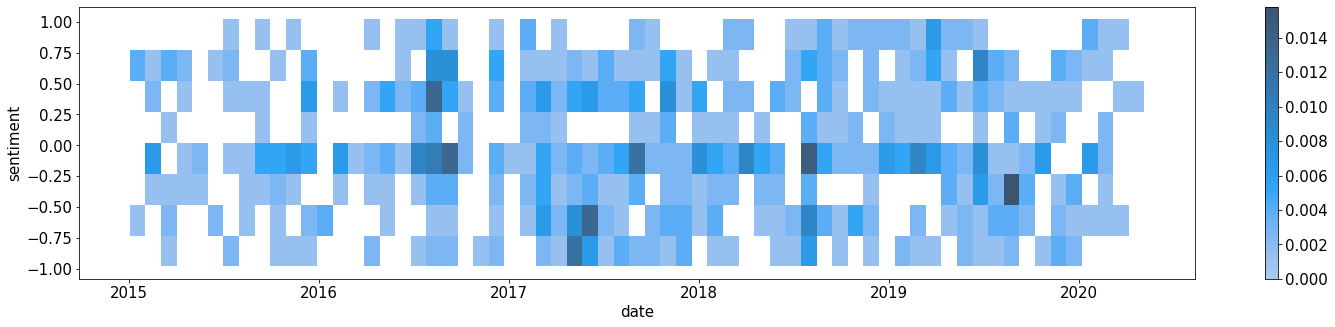

In [187]:
femonat_date_sent = add_sentiment(femonat_date)
#when and nd how 
sns.histplot(femonat_date_sent[['date','sentiment']], x="date", y="sentiment", stat='proportion',cbar=True,binwidth=(30,0.25)) 

In [196]:
##### 5-6 months of 2017
mid_2017_femonat = femonat_date_sent[ (femonat_date_sent['date'] > '2017-05-01') & (femonat_date_sent['date'] < '2017-07-01')]

In [199]:
mid_2017_femonat.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment
27420,2017-06-09-015816,"By refusing to conform to the `hijabi stereotype' , these westernised Muslim women have made it impossible for Left-leaning white saviours to covertly milk this stereotype, in our heroic battle against stereotyping.",Hillary Clinton,[Q6294],2017-06-09 15:00:28,1,"[[Hillary Clinton, 0.7997], [None, 0.2003]]",[https://whyevolutionistrue.wordpress.com/go/islam/zubin-madon-has-the-perfect-response-to-the-islamophilic-virtue-signalers/],E,-0.6833
22033,2017-05-22-062093,"means standing together against the murder of innocent Muslims, the oppression of women, the persecution of Jews, and the slaughter of Christians. Religious leaders must make this absolutely clear: Barbarism will deliver you no glory -- piety to evil will bring you no dignity.",President Donald Trump,[Q22686],2017-05-22 02:19:03,1,"[[President Donald Trump, 0.888], [None, 0.112]]",[http://www.globalsecurity.org/military/library/news/2017/05/mil-170521-voa02.htm],E,-0.8725
23685,2017-06-06-107967,"the murder of innocent Muslims, the oppression of women, the persecution of Jews,",President Donald Trump,[Q22686],2017-06-06 16:26:51,1,"[[President Donald Trump, 0.9517], [None, 0.0459], [Pope Francis, 0.0024]]",[https://www.whitehouse.gov/the-press-office/2017/06/06/remarks-vice-president-national-catholic-prayer-breakfast],E,-0.5106
23963,2017-05-23-004097,"against religious persecution of all people of all faiths and on the world stage he condemned, in his words, the murder of innocent Muslims, the oppression of women, the persecution of Jews, and the slaughter of Christians.",President Trump,[Q22686],2017-05-23 16:32:00,1,"[[President Trump, 0.473], [Mike Pence, 0.4424], [None, 0.0846]]",[https://www.thenewamerican.com/culture/item/26087-two-vice-presidential-commencement-speeches-two-different-responses],E,-0.5267
26502,2017-05-22-081365,"that... means standing together against the murder of innocent Muslims, the oppression of women, the persecution of Jews, and the slaughter of Christians.",President Donald Trump,[Q22686],2017-05-22 16:34:01,1,"[[President Donald Trump, 0.8357], [None, 0.1586], [Melania Trump, 0.0057]]",[http://www.lifezette.com/polizette/melania-trump-shines-first-foreign-trip/],E,-0.5106


### Most frequent words

In [87]:
import nltk #natural language processing library
nltk.download('stopwords') #common english words to ignore 
stopwords = nltk.corpus.stopwords.words('english') #list of words such as a, the, and etc..


#negative
femonat_clean = pd.DataFrame(columns = ['clean quotation'])
femonat_clean["clean_quotation"] = femonat_neg['quotation'].str.lower().str.replace('[^\w\s]','')
new_df = femonat_clean.clean_quotation.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df.head()
new_neg = new_df[~new_df['Word'].isin(stopwords)]
new_neg = new_neg.sort_values(by='Frequency',ascending = False)

#positive
femonat_clean = pd.DataFrame(columns = ['clean quotation'])
femonat_clean["clean_quotation"] = femonat_pos['quotation'].str.lower().str.replace('[^\w\s]','')
new_df = femonat_clean.clean_quotation.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df.head()
new_pos = new_df[~new_df['Word'].isin(stopwords)]
new_pos = new_pos.sort_values(by='Frequency',ascending = False)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aminamatt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
new_pos.reset_index()

,index,Word,Frequency
0,3,women,335
1,5,muslim,282
2,25,rights,55
3,26,people,51
4,31,like,43
...,...,...,...
2017,1306,treat,1
2018,1305,ideal,1
2019,1304,essential,1
2020,1303,believes,1


In [89]:
new_neg.head()

,Word,Frequency
2,women,330
4,muslim,259
27,muslims,48
29,oppression,44
34,people,39


In [102]:
diff_neg = new_neg[~new_neg['Word'].isin(new_pos['Word'])]
diff_neg.head(25)

,Word,Frequency
61,persecution,24
69,murder,21
70,innocent,21
78,slaughter,20
138,terror,11
162,mock,10
154,bongo,10
169,wrong,9
175,response,9
165,violence,9


In [107]:
pos_diff = new_pos[~new_pos['Word'].isin(new_neg['Word'])]
pos_diff.head(25)

,Word,Frequency
155,important,9
179,headscarf,8
176,beautiful,8
172,hair,8
170,strong,8
201,individual,7
193,love,7
247,set,6
224,mothers,6
232,misconceptions,6


# Transidentities theme

In [111]:
#Manually selected clusters of interest 
#no cluster...
KEYWORDS_TRANS = ('trans ','transsexual','transgender','transidentities')
topic_topics_df['subtopic'] = np.where(topic_topics_df.quotation.str.contains('|'.join(KEYWORDS_TRANS)),'trans','other')

In [114]:
trans = topic_topics_df[topic_topics_df['subtopic']== 'trans']
trans

,topic,quotation,subtopic
11192,4,"While in detention, transgender migrants and asylum seekers are particularly vulnerable to sexual harassment, discrimination, and abuse,",trans
11329,4,"the biggest mass action to end violence against women (cisgender, transgender, and those who hold fluid identities that are subject to gender-based violence) in human history. The campaign began as a call to action based on the staggering statistic that one in three women on the planet will be beaten or raped during her lifetime. With the world...",trans
11341,4,"There are still too many women and girls, and members of the trans community, who are victims of gender-based violence,",trans
11548,4,"Twenty-nine years later, gender-based violence and discrimination continue to happen every day, in places where we work, learn and live. As we stand together and observe moments of silence in their honour, we recommit to using our voices and platforms to speak out, and to work together to end gender-based violence. The time for change is now. T...",trans
11559,4,This project will produce a series of national situational analysis reports on sexual and gender-based violence against men and boys. Sexual violence against male transgender and Gay or Bisexual male survivors in situations of conflict and displacement will be included.,trans
...,...,...,...
55014,-1,"Accept that there is no material conflict between trans rights and women's rights, and that all trans women are subject to misogyny and patriarchal oppression.",trans
55036,-1,"We need mentors to teach us how to dress and apply makeup, how to carry ourselves, how to survive street violence and sexual harassment, how to do sex work (often the most reliable way for a trans woman to survive economically), and a thousand other things,",trans
55103,-1,"I don't exactly buy Joe Biden as a steadfast champion of transgender equality, but it's a good example of how politicians often reach good policy positions not because they are good people, but because they are strategic actors responding to incentives,",trans
55189,-1,"Shouting slogans at each other about safeguarding women, or trans women's rights, is not a replacement for a discussion about how we improve conditions for all",trans


In [119]:
num = trans['topic'].unique()

In [130]:
for i in num :
    print(i)
    print(topic_keywords_df['Name'].iloc[i+1])
    print('There are '+str(len(trans[trans['topic'] == i]))+' quotes in the category')

4
['violence', 'based', 'gender', 'domestic']
There are 7 quotes in the category
5
['students', 'sexual', 'university', 'harassment']
There are 2 quotes in the category
8
['film', 'hollywood', 'films', 'industry']
There are 5 quotes in the category
11
['discrimination', 'sex', 'title', 'ix']
There are 61 quotes in the category
14
['indigenous', 'missing', 'murdered', 'girls']
There are 3 quotes in the category
15
['stereotypes', 'gender', 'harmful', 'memo']
There are 3 quotes in the category
21
['agreements', 'arbitration', 'settlements', 'sexual']
There are 1 quotes in the category
22
['canada', 'human', 'rights', 'equality']
There are 2 quotes in the category
23
['fight', 'fought', 'equal', 'fighting']
There are 1 quotes in the category
25
['india', 'haj', 'indian', 'women']
There are 2 quotes in the category
30
['rights', 'voted', 'voting', 'gay']
There are 4 quotes in the category
32
['black', 'stand', 'want', 'wearing']
There are 1 quotes in the category
-1
['women', 'rights', 'se

In [201]:
topic_11_trans = trans[trans['topic']==11]

### Timeline

In [203]:
topic_11_trans_date = pd.DataFrame()
#replace with full dataset
for i in range(len(topic_11_trans)):
    new = df[df['quotation']==topic_11_trans.iloc[i]['quotation']]
    topic_11_trans_date = topic_11_trans_date.append(new)

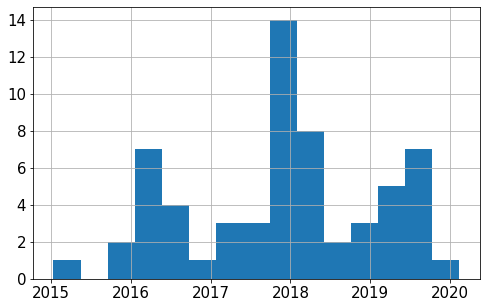

In [208]:
topic_11_trans_date
#when
fig = topic_11_trans_date['date'].hist(bins=15, figsize = [8,5])

# Sex workers 

# Time

In [134]:
PATH = 'generated_data/'
# Concatenate into one dataframes the dataframes from each pickle file. 
dataframesNames = ('QOI_2015_DF','QOI_2016_DF','QOI_2017_DF','QOI_2018_DF','QOI_2019_DF','QOI_2020_DF')
df = pd.concat([pd.read_pickle(PATH+ fp +'.pkl') for fp in dataframesNames], ignore_index=True)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
26646,2017-06-23-130636,"We need more women and parents in Parliament. And we need more family-friendly and flexible workplaces, and affordable child care, for everyone.",Katy Gallagher,[Q463507],2017-06-23 03:20:00,1,"[[Katy Gallagher, 0.4996], [None, 0.4403], [Larissa Waters, 0.0601]]",[http://www.harpersbazaar.com/culture/features/a10212753/australian-politician-breastfeeding-baby-parliament/],E


'We need more women and parents in Parliament. And we need more family-friendly and flexible workplaces, and affordable child care, for everyone.'